<a href="https://colab.research.google.com/github/Kritika45678/Infosys-Training-Project-2/blob/main/Copy_of_DCGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip MNIST.zip -d mnist_data


Streaming output truncated to the last 5000 lines.
  inflating: mnist_data/MINIST_train/9/img_25570.jpg  
  inflating: mnist_data/MINIST_train/9/img_25570.jpgZone.Identifier  
  inflating: mnist_data/MINIST_train/9/img_25576.jpg  
  inflating: mnist_data/MINIST_train/9/img_25576.jpgZone.Identifier  
  inflating: mnist_data/MINIST_train/9/img_25603.jpg  
  inflating: mnist_data/MINIST_train/9/img_25603.jpgZone.Identifier  
  inflating: mnist_data/MINIST_train/9/img_25617.jpg  
  inflating: mnist_data/MINIST_train/9/img_25617.jpgZone.Identifier  
  inflating: mnist_data/MINIST_train/9/img_25618.jpg  
  inflating: mnist_data/MINIST_train/9/img_25618.jpgZone.Identifier  
  inflating: mnist_data/MINIST_train/9/img_25622.jpg  
  inflating: mnist_data/MINIST_train/9/img_25622.jpgZone.Identifier  
  inflating: mnist_data/MINIST_train/9/img_25639.jpg  
  inflating: mnist_data/MINIST_train/9/img_25639.jpgZone.Identifier  
  inflating: mnist_data/MINIST_train/9/img_25643.jpg  
  inflating:

In [ ]:
!ls mnist_data

MINIST_test  MINIST_train


In [ ]:
from torchvision import datasets, transforms
import torch # Added import for torch.utils.data

transform = transforms.Compose([
    transforms.Grayscale(),
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)),
])

dataset = datasets.MNIST(
    root="mnist_data",
# Directory where the dataset files are located
    train=True, # Specify that this is the training dataset
    download=True,
# Changed to True to allow torchvision to manage dataset files
    transform=transform
)

dataloader = torch.utils.data.DataLoader(
    dataset,
    batch_size=128,
    shuffle=True
)

100%|██████████| 9.91M/9.91M [00:00<00:00, 37.0MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.05MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 9.17MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.39MB/s]


In [ ]:
images, labels = next(iter(dataloader))
print(images.shape) # [batch, 1, 32, 32]
print(labels[:10])

torch.Size([128, 1, 32, 32])
tensor([3, 7, 3, 0, 1, 2, 1, 2, 7, 0])


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
import numpy as np

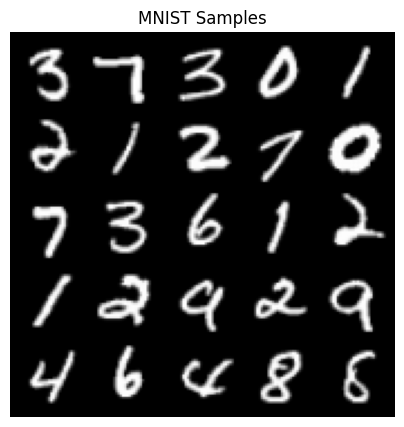

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from torchvision.utils import make_grid

plt.figure(figsize=(5,5))
plt.axis("off")
plt.title("MNIST Samples")
plt.imshow(np.transpose(make_grid(images[:25], nrow=5, normalize=True), (1,2,0)))
plt.show()

In [ ]:
import torch.nn as nn

class Generator(nn.Module):
    def __init__(self, zSize):
        super().__init__()
        self.net = nn.Sequential(
            nn.ConvTranspose2d(zSize, 256, 4, 1, 0, bias=False),
            nn.BatchNorm2d(256),
            nn.ReLU(True),

            nn.ConvTranspose2d(256, 128, 4, 2, 1, bias=False),
            nn.BatchNorm2d(128),
            nn.ReLU(True),

            nn.ConvTranspose2d(128, 64, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(True),

            nn.ConvTranspose2d(64, 1, 4, 2, 1, bias=False),
            nn.Tanh(),
        )

    def forward(self, x):
        return self.net(x)

In [ ]:
import torch.nn as nn

class Discriminator(nn.Module):
    def __init__(self,):
        super().__init__()
        self.net = nn.Sequential(
            nn.Conv2d(1, 64, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(64, 128, 4, 2, 1, bias=False),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(128, 256, 4, 2, 1, bias=False),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(256, 1, 4, 1, 0, bias=False),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.net(x).view(-1)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# The Generator and Discriminator classes must be defined before this block

# Assuming zSize is defined elsewhere or using a default value
zSize = 100 # Defining zSize, assuming it was missing or implicitly expected
G = Generator(zSize).to(device)
D = Discriminator().to(device)

criterion = nn.BCELoss()

optimizerG = optim.Adam(G.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizerD = optim.Adam(D.parameters(), lr=0.0002, betas=(0.5, 0.999))

Using device: cpu


In [ ]:
epochs = 10
fixed_noise = torch.randn(64, 100, 1, 1, device=device)

for epoch in range(epochs):
    for real_images, _ in dataloader:
        real_images = real_images.to(device)
        batch_size = real_images.size(0)

        real_labels = torch.ones(batch_size, device=device)
        fake_labels = torch.zeros(batch_size, device=device)

        # Train Discriminator
        optimizerD.zero_grad()

        # 1. Real batch
        output_real = D(real_images).view(-1)
        loss_real = criterion(output_real, real_labels)

        # 2. Fake batch
        noise = torch.randn(batch_size, 100, 1, 1, device=device)
        fake_images = G(noise)
        output_fake = D(fake_images.detach()).view(-1)
        loss_fake = criterion(output_fake, fake_labels)

        # Combine and update
        lossD = loss_real + loss_fake
        lossD.backward()
        optimizerD.step()

        # Train Generator
        optimizerG.zero_grad()

        # We use 'real' labels here to trick the discriminator
        output = D(fake_images).view(-1)
        lossG = criterion(output, real_labels)
        lossG.backward()
        optimizerG.step()

    print(f"Epoch [{epoch+1}/{epochs}] Loss D: {lossD.item():.4f}, Loss G: {lossG.item():.4f}")

Epoch [1/10] Loss D: 0.3523, Loss G: 2.6349
Epoch [2/10] Loss D: 0.5709, Loss G: 1.4110
Epoch [3/10] Loss D: 0.2485, Loss G: 3.1763
Epoch [4/10] Loss D: 0.3948, Loss G: 1.5296
Epoch [5/10] Loss D: 0.6486, Loss G: 2.3493
Epoch [6/10] Loss D: 0.1595, Loss G: 3.3101
Epoch [7/10] Loss D: 0.1089, Loss G: 3.1128
Epoch [8/10] Loss D: 0.1888, Loss G: 2.7053
Epoch [9/10] Loss D: 0.0173, Loss G: 5.4353
Epoch [10/10] Loss D: 0.3872, Loss G: 2.0184


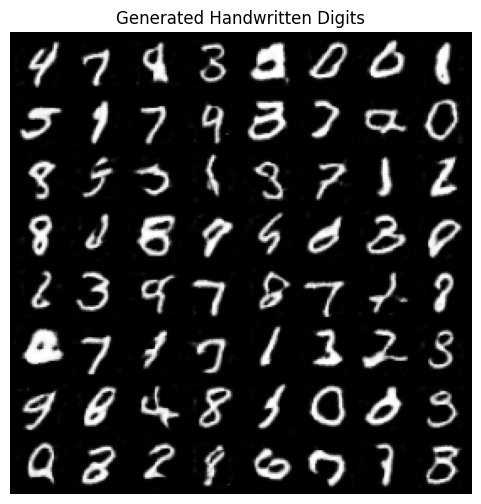

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from torchvision.utils import make_grid

with torch.no_grad():
    fake_digits = G(fixed_noise).cpu()

plt.figure(figsize=(6,6))
plt.axis("off")
plt.title("Generated Handwritten Digits")
plt.imshow(np.transpose(make_grid(fake_digits, padding=2, normalize=True), (1,2,0)))
plt.show()